# Human Speech Emotion Classification

### Action Items:


<font color='yellow'>19/04 - 21/04</font>

1) <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Share Data - Organize and share cleaned data with Izhar and Netanel by compressing it into a ZIP file and placing it under the "data" folder within the project directory. Ensure to update the project's ignore file to include this data path. <font color='blue'>Victor</font>
    </label><br>
    
2) Target definition:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Define our primary objective or target score based on our specific use case and objectives. <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font>
    </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Work on refining scoring methods. <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font>
    </label><br>
    
3) Integration and Refactoring - Merge our codebases into a unified project for seamless collaboration:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Refine the correlation heatmap to display correlations between different features, aiming to identify redundant features, reduce runtime, and enhance efficiency. <font color='blue'>Victor</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Revamp the feature importance plot according to Netanel's implementation, ensuring visual clarity with colors, titles, and labels. <font color='green'>Netanel</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Adjust the label histogram orientation to vertical and integrate it into our workflow to visualize the data before and after splitting. <font color='green'>Netanel</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Convert Victor's feature data from Numpy objects to Pandas for seamless integration and utilize the opportunity to familiarize ourselves with Pandas functionality. <font color='blue'>(Victor)</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Refactor lengthy functions into smaller, more manageable ones to enhance code readability and project structure. <font color='blue'>Victor</font></label><br>
    
4) Feature Engineering methods - Work on refining features, dimensionality reduction techniques, and feature selection strategies:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Develop a function to filter out less important features, determining a suitable threshold collaboratively.  <font color='blue'>Victor</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Utilize efficient methods such as scatter transform. <font color='red'>(???)</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Lasso for feature selection without resorting to loops. <font color='blue'>Victor</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Apply PCA for dimensionality reduction, setting 'explained_variance_ratio' to retain 95% of the feature efficiency while reducing the feature count. <font color='red'>(???)</font></label><br>
    
5) <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">MiniRocket - Finilyze this method and get its best contribution for feature extraction. <font color='magenda'>Yizhar</font></label><br>

<font color='yellow'>22/04 - 30/04   (Some of us will not be available part of these days due to Passover holiday)</font>

6)  <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">GridSearch - Determine the hyperparameters to optimize and prepare for grid search using sklearn. Employ 'n_jobs' to expedite the parameter tuning process. <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font></label><br> 


<font color='yellow'>01/05 - 04/05</font>

7) Presentation:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Collaboratively select a presentation template and distribute responsibilities for slide creation (10-15 slides total). <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Edit the presentation content, ensuring each slide clearly communicates its intended message with relevant plots, formulas, and explanations. <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Dedicate time to presentation editing and rehearsal. <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font></label><br>

In [27]:
# Install Packages
%pip install librosa --upgrade --quiet
%pip install noisereduce --upgrade --quiet

In [28]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import os
import opendatasets as od
import csv

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import seaborn as sns
import noisereduce as nr
from IPython.display import Audio
import librosa
import librosa.display
import wave

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import prjLib as lib

import warnings
warnings.filterwarnings ('ignore')

In [29]:
# Parameters

FRAME_LEN = 4096
HOP_LEN = 2048
N = 14

ravdess = ['RAVDESS','data/ravdess-emotional-speech-audio']
tess = ['TESS','data/toronto-emotional-speech-set-tess']
cremad = ['CREMA-D','data/cremad/AudioWAV']
savee = ['SAVEE','data/savee-database/AudioData']
data_paths = [ravdess,tess,cremad,savee]

## Preprocessing and Feature Extraction

In [30]:
def ExtractLabel(audio_file_path,dataset_name):
    emotion = -1
    gender = 0
    if (dataset_name == 'RAVDESS'):
        emotion = int(audio_file_path[7:8]) - 1
        gender = int(audio_file_path[18:20]) & 0x1
    if (dataset_name == 'TESS'):
        if '_neutral' in audio_file_path:
            emotion = 0
        if '_happy' in audio_file_path:
            emotion = 2
        if '_sad' in audio_file_path:
            emotion = 3
        if '_angry' in audio_file_path:
            emotion = 4
        if '_fear' in audio_file_path:
            emotion = 5
        if '_disgust' in audio_file_path:
            emotion = 6
        if '_ps' in audio_file_path:
            emotion = 7
        if 'OAF_' in audio_file_path:
            gender = 1
        if 'YAF_' in audio_file_path:
            gender = 0
    if (dataset_name == 'CREMA-D'):
        if '_NEU_' in audio_file_path:
            emotion = 0
        if '_HAP_' in audio_file_path:
            emotion = 2
        if '_SAD_' in audio_file_path:
            emotion = 3
        if '_ANG_' in audio_file_path:
            emotion = 4
        if '_FEA_' in audio_file_path:
            emotion = 5
        if '_DIS_' in audio_file_path:
            emotion = 6
        speaker_id = int(audio_file_path[0:4])
        df = pd.read_csv('data/cremad/VideoDemographics.csv')
        df = df.loc[df['ActorID'] == speaker_id]
        gender = int(df['Sex'] == 'Male')
    if (dataset_name == 'SAVEE'):
        if 'n' in audio_file_path:
            emotion = 0
        if 'h' in audio_file_path:
            emotion = 2
        if 'sa' in audio_file_path:
            emotion = 3
        if 'a' in audio_file_path:
            emotion = 4
        if 'f' in audio_file_path:
            emotion = 5
        if 'd' in audio_file_path:
            emotion = 6
        if 'su' in audio_file_path:
            emotion = 7
        gender = 1
    return emotion # np.concatenate(np.array([emotion,gender]).reshape(1,2),axis=0)

In [31]:
def ExtractFeatures(sample,sr,frame_len,hop_len,n_mfcc):
    mfcc = librosa.feature.mfcc(y=sample, sr=sr , n_mfcc=n_mfcc, n_fft=frame_len, win_length=frame_len, hop_length=hop_len)
    mfcc_mean = np.mean(mfcc,axis=1).reshape(mfcc.shape[0],1)
    # features = np.concatenate(( mfcc_mean[:,0], mfcc_median[:,0] ),axis=0)[:,0]
    return mfcc_mean[:,0] # features

In [32]:
def TrainModelTestReport(train_data,train_labels,test_data,test_labels, n_estimators,min_samples_split,random_state, plot=True):
    if plot:
        lib.PlotCorrMap(train_data, train_labels)
        #lib.PlotPairAllFeature(train_data,train_labels,train_data.shape[1])
    report, score, model = lib.TestClassificationModel(train_data,train_labels,test_data,test_labels,3, paramC=1,kernelType='rbf',n_estimators=n_estimators,min_samples_split=min_samples_split,random_state=random_state, plot=plot)
    feature_importance = []
    if plot:
        feature_importance = lib.FeaturesImportance(model,train_data)
    return report, score, feature_importance

In [33]:
def DataProcessing(frame_len,hop_len,N, plot):
    # Collect Data and Extract Features from audio files
    featured_data = []  # stores the features
    labels = []  # stores the labels
    for data_path in tqdm(data_paths,desc="Collecting Datasets"):
        root_dir = data_path[1]
        cpt = sum([len(d) for r, d, files in os.walk(root_dir)])+1
        for subdirs, dirs, files in tqdm(os.walk(root_dir), total=cpt, desc=f'Processing {data_path[0]} audio files', unit="file"):
            for file in files:
                if not '.wav' in file:
                    continue
                audio_file_path = os.path.join(subdirs, file)
                sample, sr = librosa.load(audio_file_path)
                # sample = nr.reduce_noise(y=sample, sr=sr)
                #if not np.isfinite(sample).all():
                #    continue
                # sample = FixSamples(sample,sr,4)
                features = ExtractFeatures(sample,sr,frame_len,hop_len,N)
                label = ExtractLabel(file,data_path[0])
                featured_data.append(features)
                labels.append(label)
    featured_data = np.asarray(featured_data)
    labels = np.array(labels)
    print(f'Data with total {featured_data.shape[0]} samples collected with {featured_data.shape[1]} features.')

    # Data samples split
    train_data,train_labels,test_data,test_labels = lib.PlotSplitData(featured_data,labels,trainRatio=0.8,plot=plot)

    '''
    # Select features
    delete_features_indexes = np.concatenate((np.arange(0,76),np.arange(146,241)),axis=0)
    train_data = np.delete(train_data,delete_features_indexes,axis=1)
    test_data = np.delete(test_data,delete_features_indexes,axis=1)
    print(f'Selected {train_data.shape[1]} features.')
    '''

    # Data extrapulation of train data, for uniform histogram of classes
    dataL1 = train_data[(train_labels==1)]
    L1 = train_labels[(train_labels==1)]
    dataL7 = train_data[(train_labels==7)]
    L7 = train_labels[(train_labels==7)]
    train_data = np.concatenate((train_data,dataL1,dataL1,dataL1,dataL1,dataL1,dataL7),axis=0)
    train_labels = np.concatenate((train_labels,L1,L1,L1,L1,L1,L7),axis=0)
    print(f'Train Data extrapulated with total {train_data.shape[0]} samples collected with {train_data.shape[1]} features.')

    # Data extrapulation of test data, for uniform histogram of classes
    dataL1 = test_data[(test_labels==1)]
    L1 = test_labels[(test_labels==1)]
    dataL7 = test_data[(test_labels==7)]
    L7 = test_labels[(test_labels==7)]
    test_data = np.concatenate((test_data,dataL1,dataL1,dataL1,dataL1,dataL1,dataL7),axis=0)
    test_labels = np.concatenate((test_labels,L1,L1,L1,L1,L1,L7),axis=0)
    print(f'Test Data extrapulated with total {test_data.shape[0]} samples collected with {test_data.shape[1]} features.')

    # Test features with a simple model
    n_estimators = 100
    min_samples_split = 6
    random_state = 1
    report, score, feature_importance = TrainModelTestReport(train_data,train_labels,test_data,test_labels, n_estimators=n_estimators,min_samples_split=min_samples_split,random_state=random_state, plot=plot)
    return report, score, feature_importance, train_data,train_labels,test_data,test_labels

In [34]:
def TestImportantFeatures(feature_importance,feature_importance_threshold,train_data,train_labels,test_data,test_labels):
    # Remove weak features
    weak_features_indexes = np.where(feature_importance < feature_importance_threshold)[0]
    train_data = np.delete(train_data,weak_features_indexes,axis=1)
    test_data = np.delete(test_data,weak_features_indexes,axis=1)
    display(train_data.shape[1])

    # Test  again after removing not important features
    n_estimators = 100
    min_samples_split = 6
    random_state = 1
    TrainModelTestReport(train_data,train_labels,test_data,test_labels, n_estimators=n_estimators,min_samples_split=min_samples_split,random_state=random_state)

Processing RAVDESS audio files:   0%|          | 0/25 [00:00<?, ?file/s]

Processing TESS audio files:   0%|          | 0/16 [00:00<?, ?file/s]

Processing CREMA-D audio files:   0%|          | 0/1 [00:00<?, ?file/s]

Processing SAVEE audio files:   0%|          | 0/5 [00:00<?, ?file/s]

Data with total 12162 samples collected with 14 features.


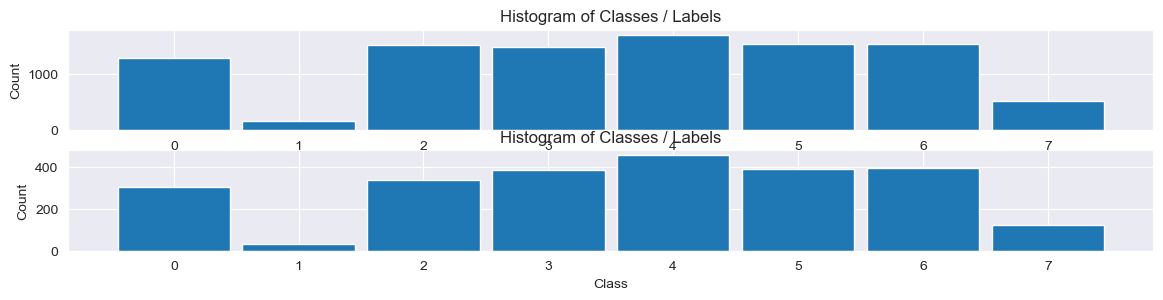

Train Data extrapulated with total 11051 samples collected with 14 features.
Test Data extrapulated with total 2723 samples collected with 14 features.


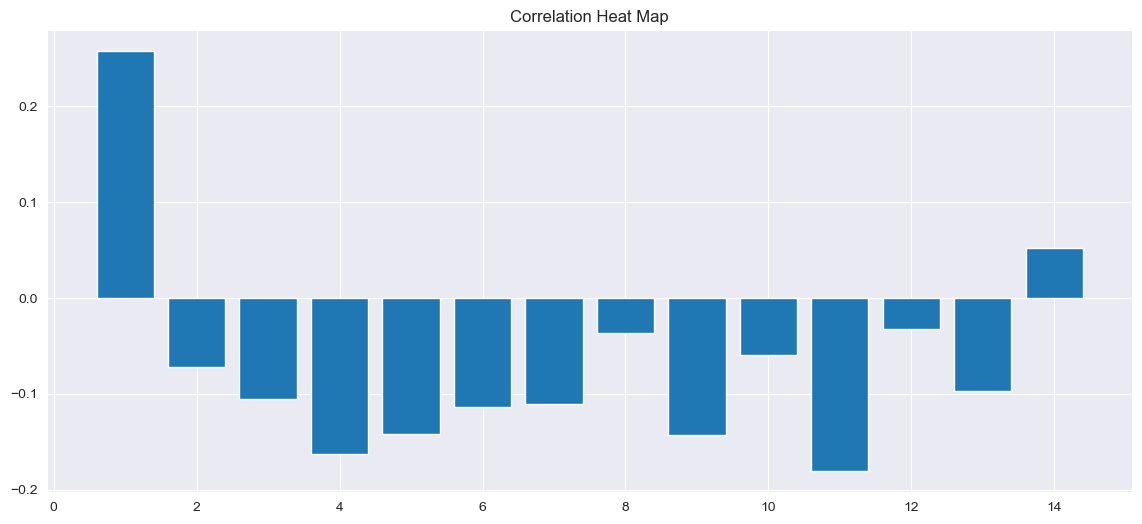

Prediction Train Accuracy: 99.76 %
Prediction Test Accuracy: 58.98 %
              precision    recall  f1-score   support

           0       0.47      0.55      0.51       304
           1       0.76      0.82      0.79       198
           2       0.47      0.49      0.48       338
           3       0.56      0.63      0.59       388
           4       0.67      0.78      0.72       458
           5       0.54      0.38      0.45       393
           6       0.53      0.42      0.47       394
           7       0.79      0.78      0.79       250

    accuracy                           0.59      2723
   macro avg       0.60      0.61      0.60      2723
weighted avg       0.59      0.59      0.58      2723



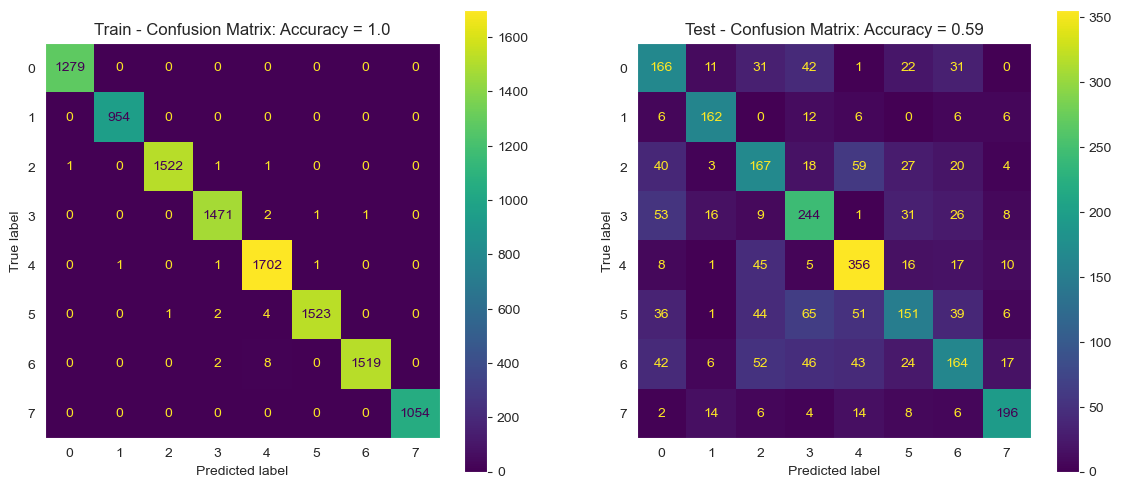

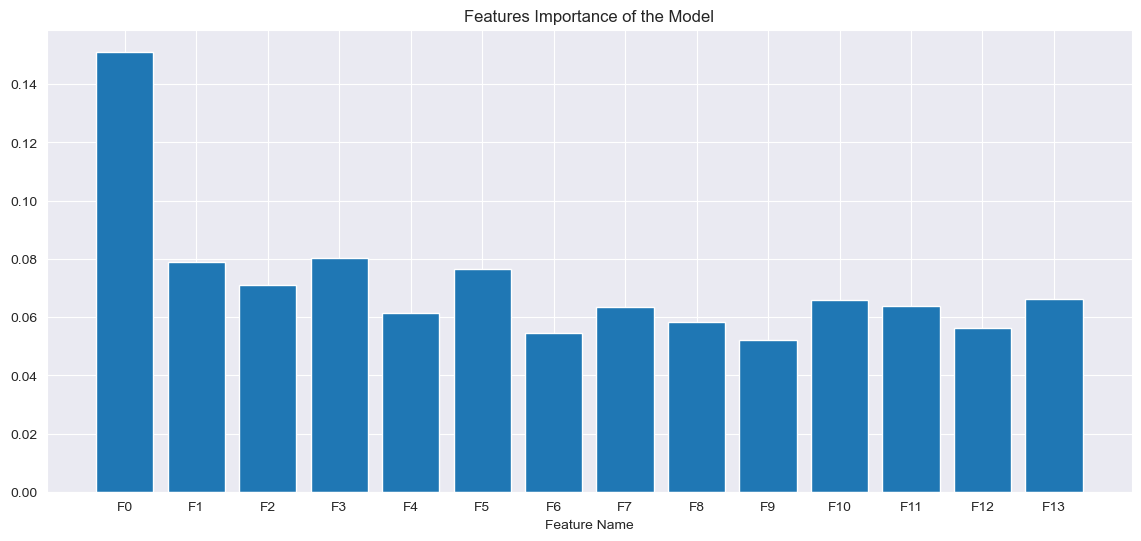

In [35]:
report, score, feature_importance, train_data,train_labels,test_data,test_labels = DataProcessing(FRAME_LEN,HOP_LEN,N, plot=True)

10

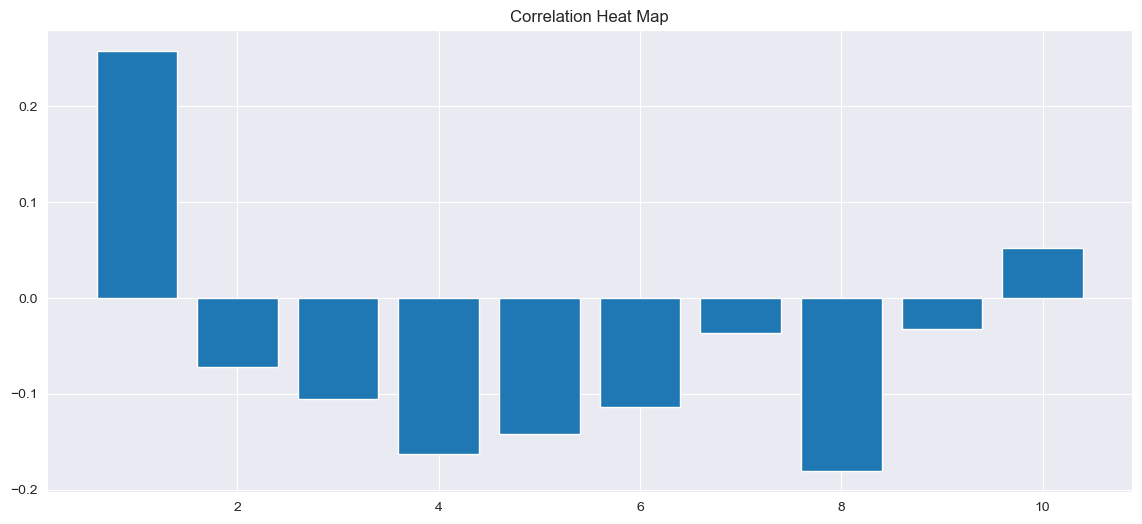

Prediction Train Accuracy: 99.61 %
Prediction Test Accuracy: 57.44 %
              precision    recall  f1-score   support

           0       0.46      0.53      0.49       304
           1       0.77      0.88      0.82       198
           2       0.46      0.46      0.46       338
           3       0.55      0.63      0.59       388
           4       0.64      0.74      0.69       458
           5       0.54      0.37      0.44       393
           6       0.50      0.41      0.45       394
           7       0.76      0.74      0.75       250

    accuracy                           0.57      2723
   macro avg       0.58      0.59      0.59      2723
weighted avg       0.57      0.57      0.57      2723



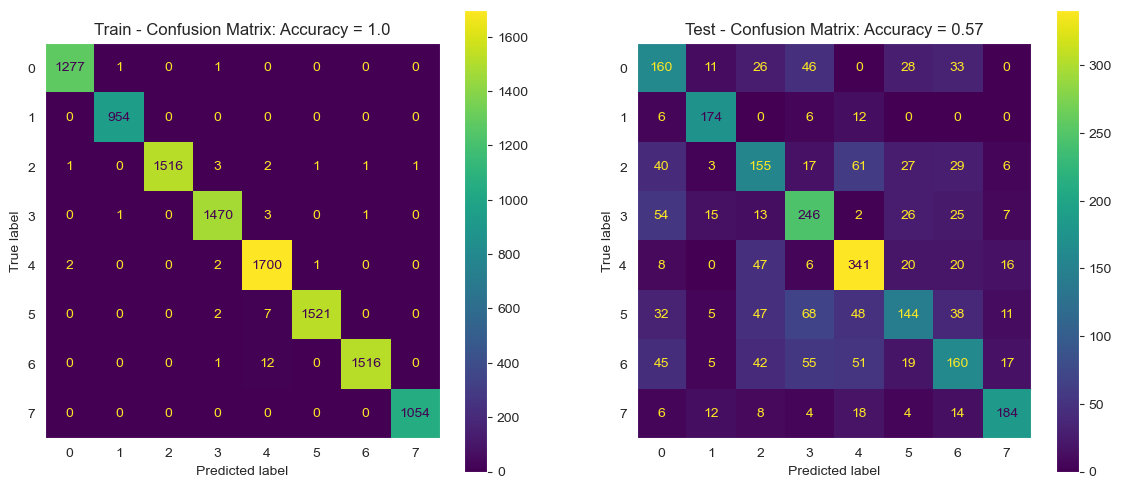

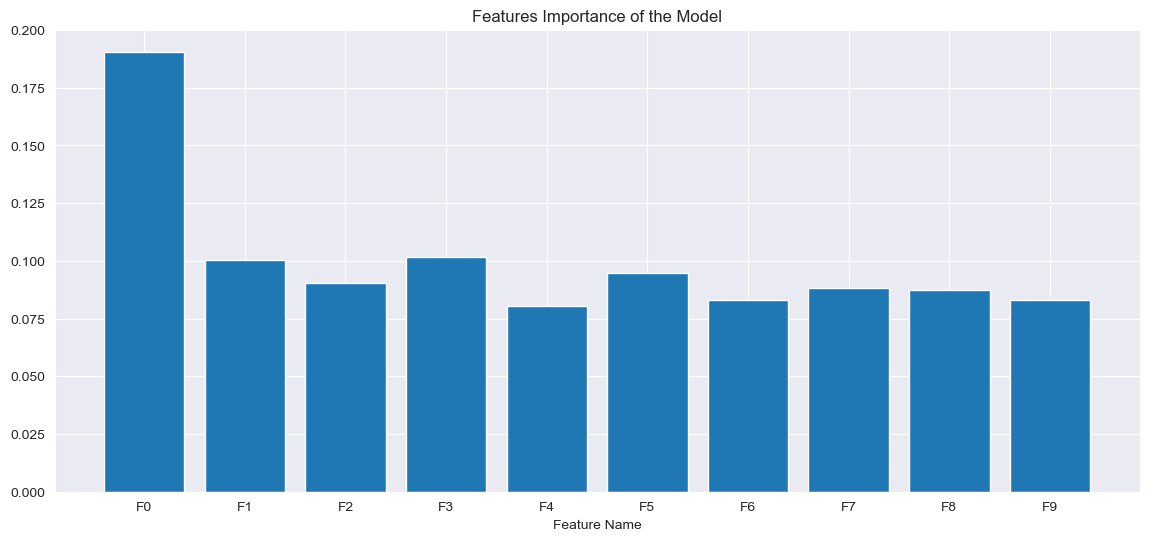

In [36]:
TestImportantFeatures(feature_importance,0.06,train_data,train_labels,test_data,test_labels)

## Search for best Classifier (with different hyperparameters)